# Covid-19 data in Greece

## Import Libraries

In [1]:
# Os, Numpy, Pandas, Matplotlib, Datetime
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, timedelta

## Dates

In [2]:
# Set current date to a variable 
# "-timedelta(days=1)" if todays's results are not available yet, otherwise delete it
today = date.today()
# Extra variables for saving plots as images
#----------------------------------------------------------------------------------
today_date = str(today.day) + "-" + str(today.month) + "-" + str(today.year)
yesterday_date = str(today.day-1) + "-" + str(today.month) + "-" + str(today.year)

dir_name = 'Plots_per_Date/' + "Plots_for_" + today_date
os.mkdir(dir_name) # Create folder for today's plots
#----------------------------------------------------------------------------------

# Define a date timeline until 01/06 (1st of June) for now
start_date = date(2020, 2, 26) # 26/02
end_date = date(2020, 6, 1)    # 01/06
diff_date = today - start_date

dates = []
for i in range(diff_date.days + 1):
    day = start_date + timedelta(days=i)
    dates.append(day)
    
# List of dates in short form (day/month)
dates_list = []
for cday in dates:
    dates_list.append(str(cday.day)+'/'+str(cday.month))
    
cd = dates.index(today) # Index of current date in list

## Using the covid-19_greece_data.xlsx local file to load the dataframes

In [3]:
df1 = pd.read_csv('covid-19_greece_data.csv', 
                  usecols = ['Dates','Total Cases','Daily Cases','Increase %','Total Recovered','Active Cases'])
# For df2 dataframe with the column of max temperatures, show the data without last row
df2 = pd.read_csv('covid-19_greece_data.csv')[:diff_date.days]

In [4]:
df1

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases
0,26/02,1,1,100.00%,0,1
1,27/02,3,2,200.00%,0,3
2,28/02,4,1,33.33%,0,4
3,29/02,7,3,75.00%,0,7
4,01/03,7,0,0.00%,0,7
...,...,...,...,...,...,...
95,31/05,2917,2,0.07%,1374,1543
96,01/06,2918,2,0.03%,1374,1544
97,02/06,2937,19,0.65%,1374,1563
98,03/06,2937,0,0.00%,1374,1563


### Change the dates column

In [5]:
df1['Dates'] = dates_list
df2['Dates'] = dates_list[:diff_date.days]

## DataFrames

In [6]:
df1

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases
0,26/2,1,1,100.00%,0,1
1,27/2,3,2,200.00%,0,3
2,28/2,4,1,33.33%,0,4
3,29/2,7,3,75.00%,0,7
4,1/3,7,0,0.00%,0,7
...,...,...,...,...,...,...
95,31/5,2917,2,0.07%,1374,1543
96,1/6,2918,2,0.03%,1374,1544
97,2/6,2937,19,0.65%,1374,1563
98,3/6,2937,0,0.00%,1374,1563


In [7]:
df2

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases,Max Temperatures
0,26/2,1,1,100.00%,0,1,18.8
1,27/2,3,2,200.00%,0,3,18.8
2,28/2,4,1,33.33%,0,4,14.9
3,29/2,7,3,75.00%,0,7,12.5
4,1/3,7,0,0.00%,0,7,15.5
...,...,...,...,...,...,...,...
94,30/5,2915,7,0.21%,1374,1541,23.3
95,31/5,2917,2,0.07%,1374,1543,23.8
96,1/6,2918,2,0.03%,1374,1544,24.3
97,2/6,2937,19,0.65%,1374,1563,22.7


In [8]:
# Full dataframes
pd.set_option('display.max_rows', None)
df1

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases
0,26/2,1,1,100.00%,0,1
1,27/2,3,2,200.00%,0,3
2,28/2,4,1,33.33%,0,4
3,29/2,7,3,75.00%,0,7
4,1/3,7,0,0.00%,0,7
5,2/3,7,0,0.00%,0,7
6,3/3,7,0,0.00%,0,7
7,4/3,9,2,28.57%,0,9
8,5/3,31,22,244.44%,0,31
9,6/3,45,14,45.16%,0,45


In [9]:
# Last 5 days of data
df1.tail()

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases
95,31/5,2917,2,0.07%,1374,1543
96,1/6,2918,2,0.03%,1374,1544
97,2/6,2937,19,0.65%,1374,1563
98,3/6,2937,0,0.00%,1374,1563
99,4/6,2952,15,0.51%,1374,1578


In [10]:
df2.tail()

,Dates,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases,Max Temperatures
94,30/5,2915,7,0.21%,1374,1541,23.3
95,31/5,2917,2,0.07%,1374,1543,23.8
96,1/6,2918,2,0.03%,1374,1544,24.3
97,2/6,2937,19,0.65%,1374,1563,22.7
98,3/6,2937,0,0.00%,1374,1563,23.5


In [11]:
# Set dates column as index
df1.set_index('Dates', inplace=True)
df2.set_index('Dates', inplace=True)
df1

,Total Cases,Daily Cases,Increase %,Total Recovered,Active Cases
Dates,,,,,
26/2,1,1,100.00%,0,1
27/2,3,2,200.00%,0,3
28/2,4,1,33.33%,0,4
29/2,7,3,75.00%,0,7
1/3,7,0,0.00%,0,7
2/3,7,0,0.00%,0,7
3/3,7,0,0.00%,0,7
4/3,9,2,28.57%,0,9
5/3,31,22,244.44%,0,31


### Total Cases per Day

<Figure size 432x288 with 0 Axes>

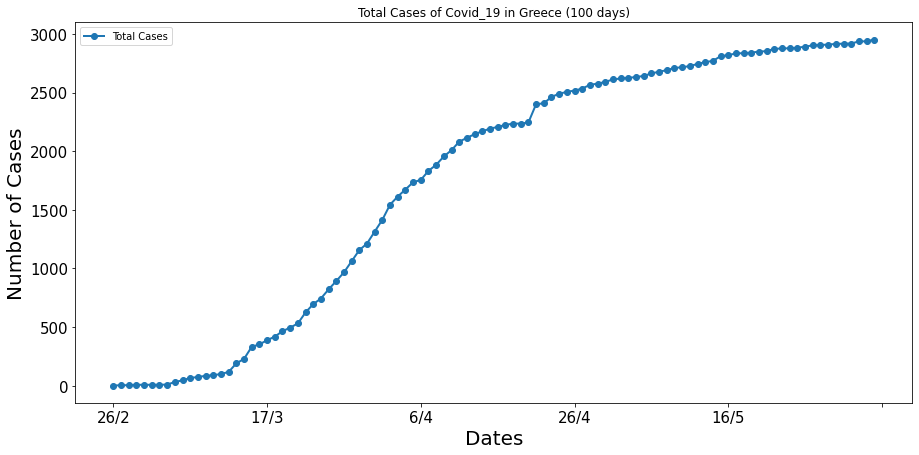

In [12]:
plt.figure()
df1[['Total Cases']].plot(figsize=(15,7), linewidth=2, fontsize=15, 
                         title='Total Cases of Covid_19 in Greece ('+str(len(df1['Total Cases']))+' days)',  
                         marker='o')
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.savefig(dir_name + "/TotalCases_" + today_date + ".png", bbox_inches='tight')
plt.show()

### Daily Cases

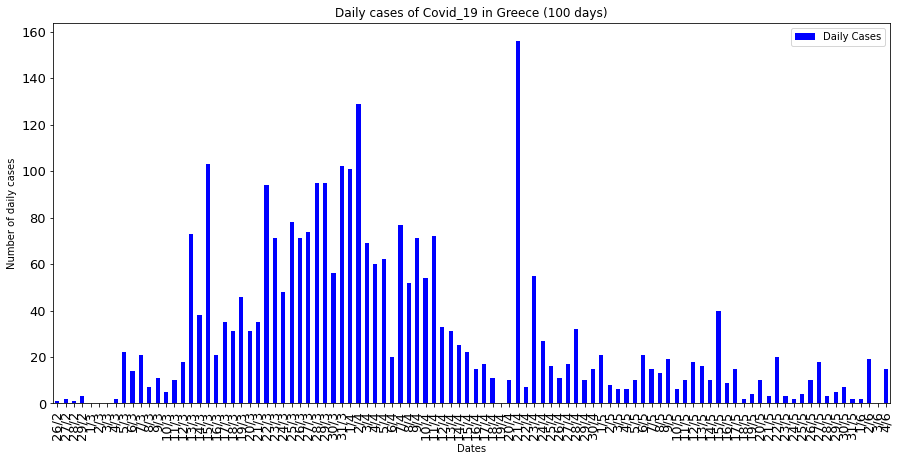

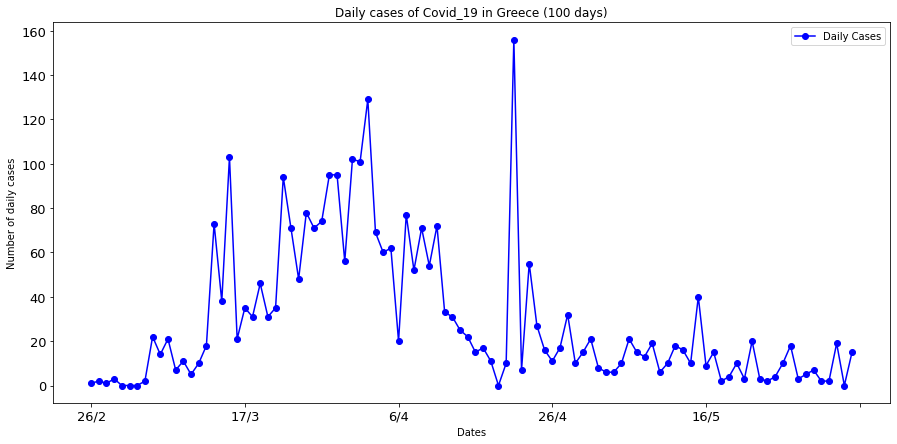

In [13]:
plt.figure()
df1['Daily Cases'].plot(kind='bar', figsize=(15,7), color="blue", fontsize=13)
plt.title('Daily cases of Covid_19 in Greece ('+str(len(df1['Total Cases']))+' days)')
plt.xlabel('Dates')
plt.ylabel('Number of daily cases')
plt.legend()
plt.savefig(dir_name + "/DailyCasesBars_" + today_date + ".png", bbox_inches='tight')
plt.show()

plt.figure()
df1['Daily Cases'].plot(kind='line', figsize=(15,7), color="blue", fontsize=13, marker='o')
plt.title('Daily cases of Covid_19 in Greece ('+str(len(df1['Total Cases']))+' days)')
plt.xlabel('Dates')
plt.ylabel('Number of daily cases')
plt.legend()
plt.savefig(dir_name + "/DailyCases_" + today_date + ".png", bbox_inches='tight')
plt.show()

### Total Cases and Total Revoverd

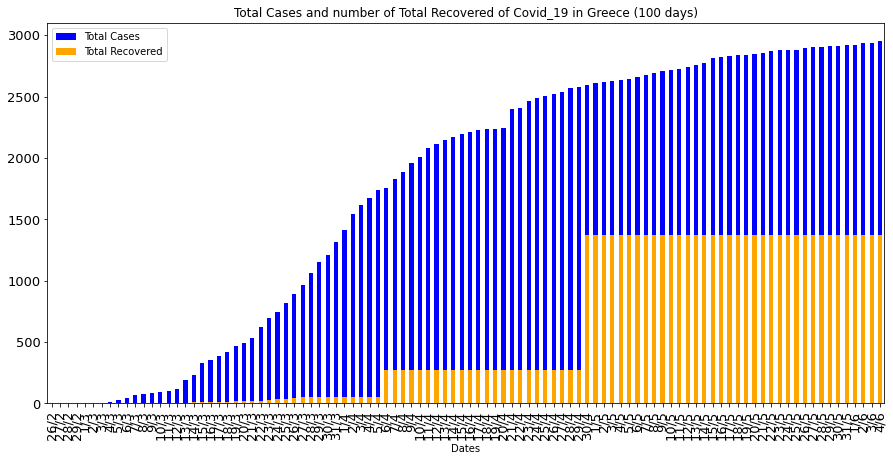

In [14]:
plt.figure()
df1['Total Cases'].plot(kind='bar', figsize=(15,7), color="blue", fontsize=13)
df1['Total Recovered'].plot(kind='bar', figsize=(15,7), color="orange", fontsize=13)
plt.title('Total Cases and number of Total Recovered of Covid_19 in Greece ('+str(len(df1['Total Cases']))+' days)')
plt.xlabel('Dates')
plt.legend()
plt.savefig(dir_name + "/TotalCases_Recovered_" + today_date + ".png", bbox_inches='tight')
plt.show()

### Total and Active number of cases

<Figure size 432x288 with 0 Axes>

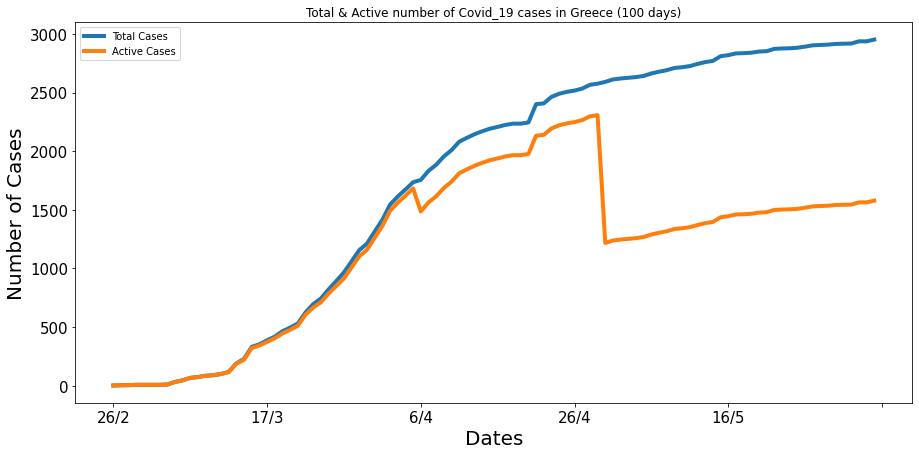

In [15]:
plt.figure()
df1[['Total Cases','Active Cases']].plot(figsize=(15,7), linewidth=4, 
                                        fontsize=15,title='Total & Active number of Covid_19 cases in Greece (' +str(len(df1['Total Cases']))+' days)')
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.savefig(dir_name + "/Total_ActiveCases_" + today_date + ".png", bbox_inches='tight')
plt.show()

### Total and Daily number of cases

<Figure size 432x288 with 0 Axes>

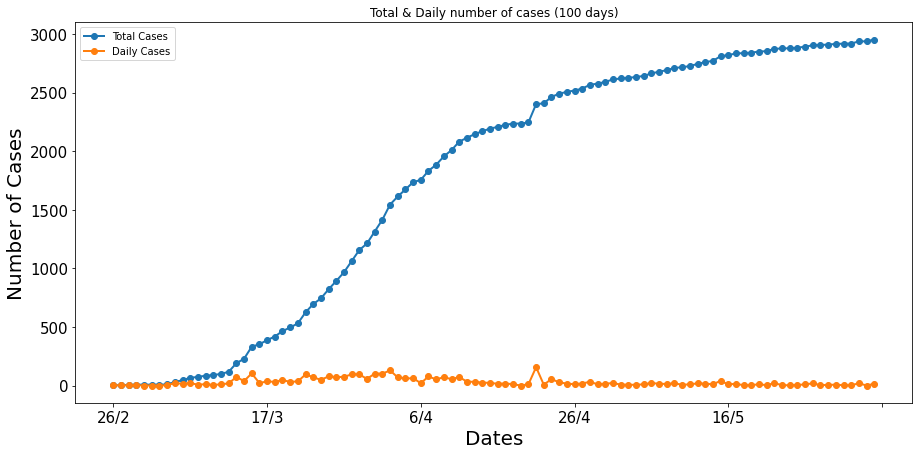

In [16]:
plt.figure()
df1[['Total Cases','Daily Cases']].plot(figsize=(15,7), linewidth=2, fontsize=15,
                                        title='Total & Daily number of cases (' +str(len(df1['Total Cases']))+' days)', marker='o')
plt.xlabel('Dates', fontsize=20)
plt.ylabel('Number of Cases', fontsize=20)
plt.savefig(dir_name + "/TotalDaily_" + today_date + ".png", bbox_inches='tight')
plt.show()

### Max temperature per day

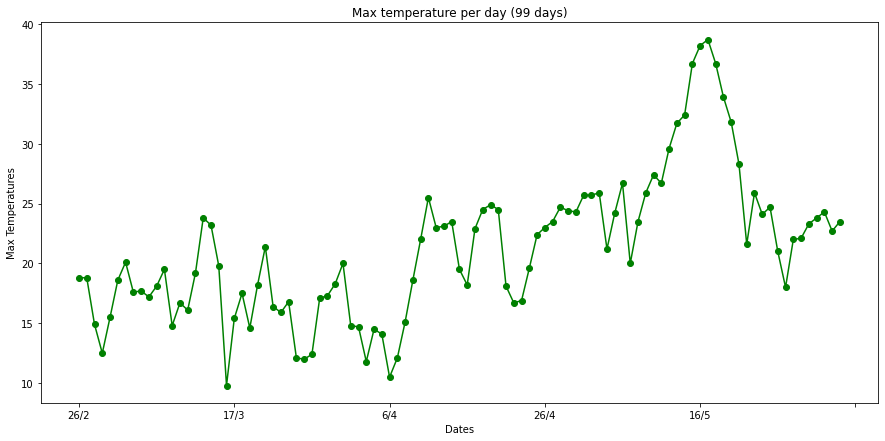

In [17]:
plt.figure()
df2['Max Temperatures'].plot(kind='line', figsize=(15,7), color="green", fontsize=10, marker='o')
plt.title('Max temperature per day ('+str(len(df2['Total Cases']))+' days)')
plt.xlabel('Dates')
plt.ylabel('Max Temperatures')
plt.savefig(dir_name + "/MaxTemps_" + yesterday_date + ".png", bbox_inches='tight')
plt.show()

### Daily Cases and Max Temperatures per day

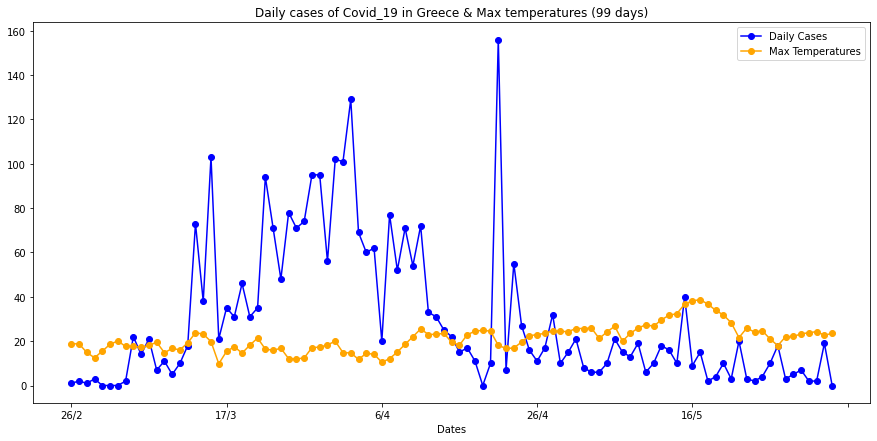

In [18]:
plt.figure()
df2['Daily Cases'].plot(kind='line', figsize=(15,7), color="blue", fontsize=10, marker='o')
df2['Max Temperatures'].plot(kind='line', figsize=(15,7), color="orange", fontsize=10, marker='o')
plt.title('Daily cases of Covid_19 in Greece & Max temperatures ('+str(len(df2['Total Cases']))+' days)')
plt.xlabel('Dates')
plt.legend()
plt.savefig(dir_name + "/DailyCases_MaxTemps_" + yesterday_date + ".png", bbox_inches='tight')
plt.show()

# Sources -Values taken from  :  
### Covid19.gov.gr : https://covid19.gov.gr/covid19-live-analytics/
###          Wikipedia : https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Greece
### Acharnes weather station statistics : http://www.meteoacharnes.gr/statistika/datasummary.htm